#Распознавание образов

**Цель работы:** обучить нейронную сеть Хопфилда распознавать образ.

Создаются эталонные образы матриц с греческими цифрами. Размер матриц 10х10.

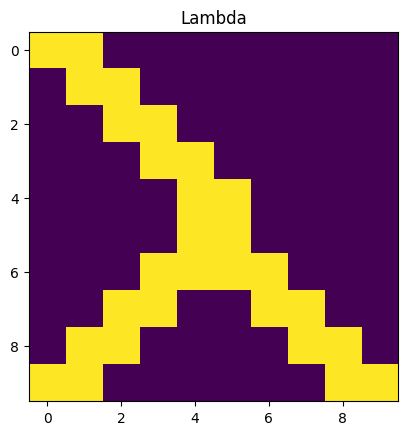

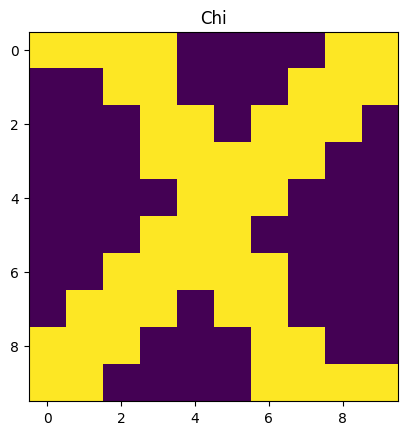

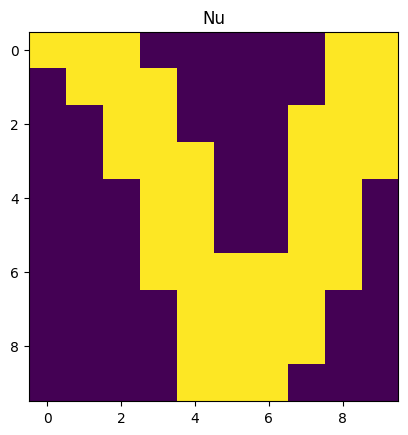

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# греческая цифра, обозначающая 30
lam = np.array([
    [1, 1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 1, 1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
    [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
    [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
])

# греческая цифра, обозначающия 600
chi = np.array([
    [1, 1, 1, 1, -1, -1, -1, -1, 1, 1],
    [-1, -1, 1, 1, -1, -1, -1, 1, 1, 1],
    [-1, -1, -1, 1, 1, -1, 1, 1, 1, -1],
    [-1, -1, -1, 1, 1, 1, 1, 1, -1, -1],
    [-1, -1, -1, -1, 1, 1, 1, -1, -1, -1],
    [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1],
    [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1],
    [-1, 1, 1, 1, -1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, 1, 1]
])

# греческая цифра, обозначающия 50
nu = np.array([
    [1, 1, 1, -1, -1, -1, -1, -1, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, -1, 1, 1],
    [-1, -1, 1, 1, -1, -1, -1, 1, 1, 1],
    [-1, -1, 1, 1, 1, -1, -1, 1, 1, 1],
    [-1, -1, -1, 1, 1, -1, -1, 1, 1, -1],
    [-1, -1, -1, 1, 1, -1, -1, 1, 1, -1],
    [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
    [-1, -1, -1, -1, 1, 1, 1, 1, -1, -1],
    [-1, -1, -1, -1, 1, 1, 1, 1, -1, -1],
    [-1, -1, -1, -1, 1, 1, 1, -1, -1, -1]
])

# визуализация образов
plt.imshow(lam)
plt.title("Lambda")
plt.show()
plt.imshow(chi)
plt.title("Chi")
plt.show()
plt.imshow(nu)
plt.title("Nu")
plt.show()

 Создана функция зашумления эталонного изображения путем внесения в него в случайных местах – шумов (изменение значения пикселя в случайных местах изображения).

 Функция принимает на вход массив эталонного изображения и процент зашумления. При помощи функции np.random.choice создается массив с номерами пикселей для инвертирования. Затем при помощи цикла соответствующие пиксели изменяются противоположным значением. В результате функция возвращает измененную матрицу эталонного изображения.

In [ ]:
def add_noise(image, noise_percent) -> np.array:
    noisy_image = np.copy(image)
    image_size = image.shape[0] * image.shape[1]
    num_noise_pixels = int(image_size * noise_percent / 100)
    noise_indices = np.random.choice(image_size, num_noise_pixels, replace=False)
    for index in noise_indices:
        row = index // image.shape[1]
        col = index % image.shape[1]
        noisy_image[row, col] *= -1

    return noisy_image

Создается набор данных с шумами для тестирования. Процент шума составляет 20%.

In [ ]:
noisy_lam_20 = add_noise(lam, 20)
noisy_chi_20 = add_noise(chi, 20)
noisy_nu_20 = add_noise(nu, 20)

Выполнено обучение сети Хопфилда. Обучение производится при помощи сложения произведений каждой транспортированной строки из матрицы, задающей образ, на саму себя. Затем диагональ матрицы обнуляется из-за особенностей архитектуры сети Хопфилда, чтобы матрица не сходилась. И далее для нормализации значений матрицы коэффициентов производится деление на общее количество нейронов. Обучение сети производится на трех образах греческих цифр. Три образа возможны так как M/N=3/100=0.03 и это значение не превышает 0.14.

In [ ]:
n_neurons = lam.shape[0]

# матрица весовых коэф.
W = np.zeros((n_neurons, n_neurons))

# обучение сети путем изменения матрицы весовых коэф.
for s in lam:
    # создание матрицы обновления весов
    W += np.outer(s.flatten(), s.flatten()) # внешнее произведение векторов

for s in chi:
    W += np.outer(s.flatten(), s.flatten())

for s in nu:
    W += np.outer(s.flatten(), s.flatten())

# зануление диагонали матрицы весов
np.fill_diagonal(W, 0)

# нормализация коэффициентов
W /= n_neurons*n_neurons

# вывод матрицы весов
print("Матрица весовых коэффициентов W:")
print(W)

Матрица весовых коэффициентов W:
[[ 0.    0.22  0.04 -0.12 -0.14 -0.06  0.   -0.02  0.08  0.18]
 [ 0.22  0.    0.12 -0.12 -0.22 -0.1  -0.04 -0.06  0.08  0.14]
 [ 0.04  0.12  0.    0.06 -0.2  -0.12 -0.06  0.    0.06  0.12]
 [-0.12 -0.12  0.06  0.    0.04 -0.04 -0.02  0.04  0.06  0.  ]
 [-0.14 -0.22 -0.2   0.04  0.    0.18  0.08  0.02 -0.08 -0.14]
 [-0.06 -0.1  -0.12 -0.04  0.18  0.    0.16 -0.06 -0.16 -0.1 ]
 [ 0.   -0.04 -0.06 -0.02  0.08  0.16  0.    0.08 -0.1  -0.08]
 [-0.02 -0.06  0.    0.04  0.02 -0.06  0.08  0.    0.12  0.02]
 [ 0.08  0.08  0.06  0.06 -0.08 -0.16 -0.1   0.12  0.    0.2 ]
 [ 0.18  0.14  0.12  0.   -0.14 -0.1  -0.08  0.02  0.2   0.  ]]


Выполняется предсказание. Для проверки качества обучения модели подаются тестовые изображения (зашумлённые), которые умножаются на матрицу весовых коэффициентов и выполняется предсказание, то есть происходит распознавание образа.

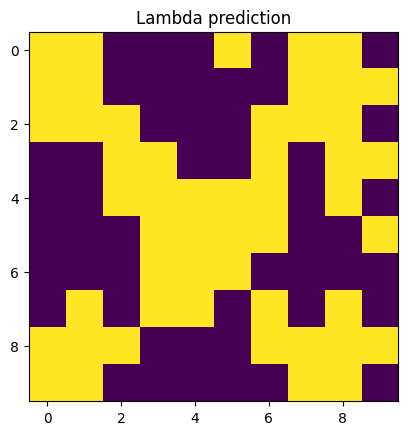

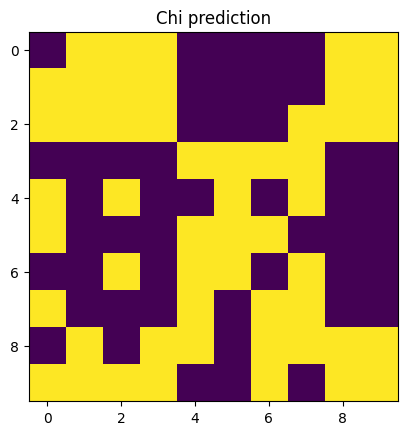

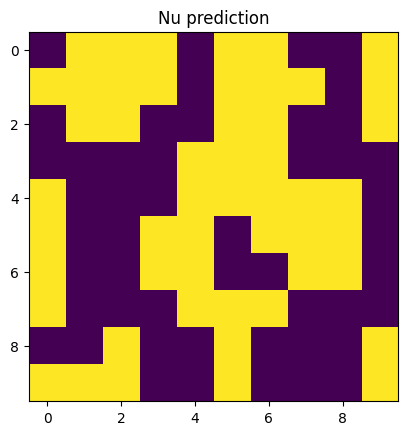

In [ ]:
predicted_lam = noisy_lam_20.copy()
predicted_lam = np.sign(np.dot(W, predicted_lam))
plt.imshow(predicted_lam)
plt.title("Lambda prediction")
plt.show()


predicted_chi = noisy_chi_20.copy()
predicted_chi = np.sign(np.dot(W, predicted_chi))
plt.imshow(predicted_chi)
plt.title("Chi prediction")
plt.show()


predicted_nu = noisy_nu_20.copy()
predicted_nu = np.sign(np.dot(W, predicted_nu))
plt.imshow(predicted_nu)
plt.title("Nu prediction")
plt.show()

Выводится эталонное изображение, зашумлённое изображение и предсказанное изображение и количество пикселей, которые были неверно распознаны (отличие предсказанного изображения от эталонного).

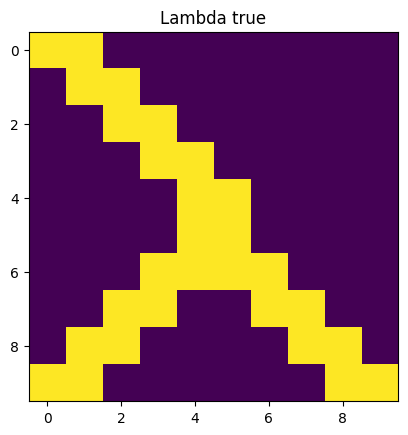

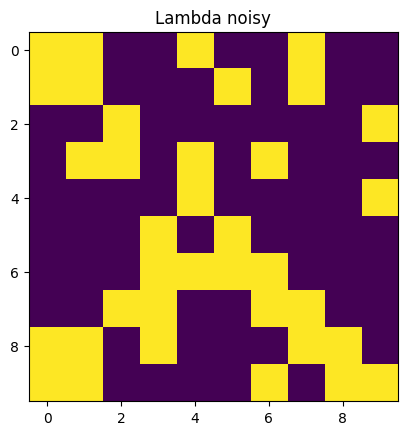

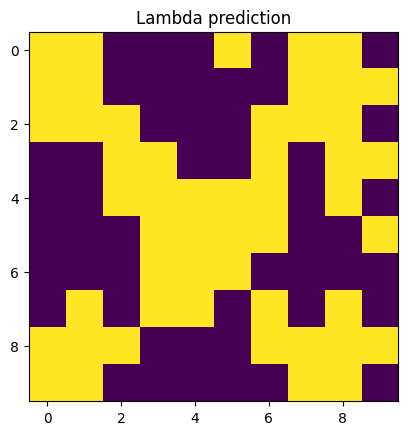

Количество неверно распознанных пикселей для образа Lam равно 37


In [ ]:
plt.imshow(lam)
plt.title("Lambda true")
plt.show()
plt.imshow(noisy_lam_20)
plt.title("Lambda noisy")
plt.show()
plt.imshow(predicted_lam)
plt.title("Lambda prediction")
plt.show()
wrong_pixels_count = np.sum(predicted_lam != lam)
print(f"Количество неверно распознанных пикселей для образа Lam равно {wrong_pixels_count}")

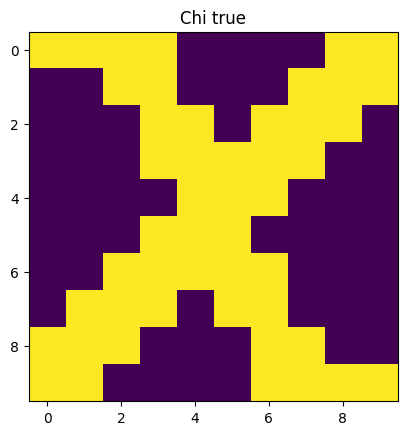

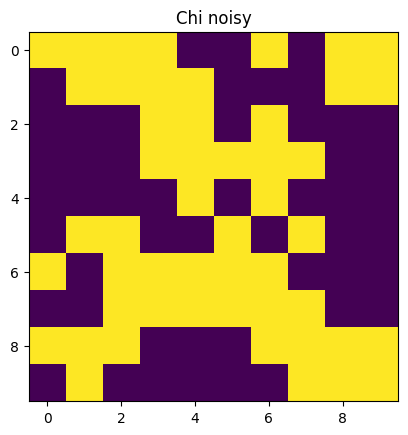

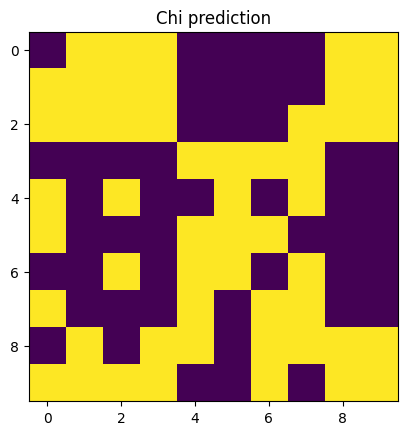

Количество неверно распознанных пикселей для образа Chi равно 38


In [ ]:
plt.imshow(chi)
plt.title("Chi true")
plt.show()
plt.imshow(noisy_chi_20)
plt.title("Chi noisy")
plt.show()
plt.imshow(predicted_chi)
plt.title("Chi prediction")
plt.show()
wrong_pixels_count = np.sum(predicted_chi != chi)
print(f"Количество неверно распознанных пикселей для образа Chi равно {wrong_pixels_count}")

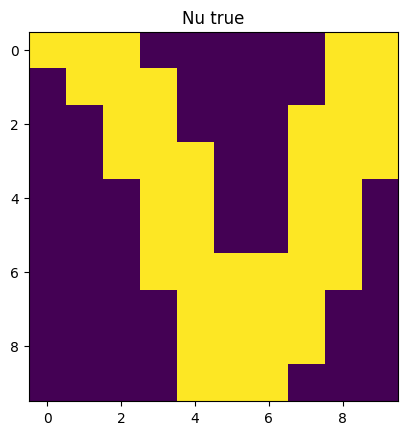

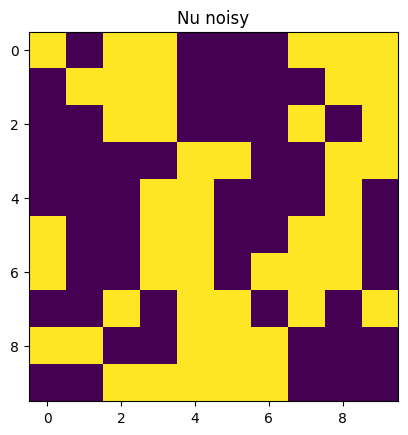

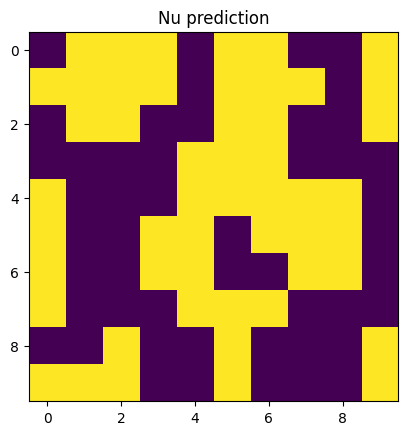

Количество неверно распознанных пикселей для образа Nu равно 45


In [ ]:
plt.imshow(nu)
plt.title("Nu true")
plt.show()
plt.imshow(noisy_nu_20)
plt.title("Nu noisy")
plt.show()
plt.imshow(predicted_nu)
plt.title("Nu prediction")
plt.show()
wrong_pixels_count = np.sum(predicted_nu != nu)
print(f"Количество неверно распознанных пикселей для образа Nu равно {wrong_pixels_count}")

Исходя из полученных предсказаний можно заметить, что ни одно из предсказанных изображений не было верным. Ближе всего к истинному Chi, так как оно имеет наименьшее среди всех (33 пикселя) количество неверных пикселей. Однако все изображения сеть не смогла распознать.

Вычисление ошибки восстановления. Ошибка восстановления – отношение несовпадений тестовой матрицы с эталонной и несовпадений предсказанного результата с эталонным. Для расчета несовпадений используется функция суммирования истинных значений по создаваемому массиву булевых значений относительно условия несовпадения элементов матриц под одинаковым индексом.

In [ ]:
error_pred_true_lam = np.sum(predicted_lam != lam)
error_noisy_true_lam = np.sum(noisy_lam_20 != lam)
total_error_lam = error_noisy_true_lam / error_pred_true_lam

print(f"Ошибка восстановления для Lam равна {total_error_lam}")

error_pred_true_chi = np.sum(predicted_chi != chi)
error_noisy_true_chi = np.sum(noisy_chi_20 != chi)
total_error_chi = error_noisy_true_chi/  error_pred_true_chi

print(f"Ошибка восстановления для Chi равна {total_error_chi}")

error_pred_true_nu = np.sum(predicted_nu != nu)
error_noisy_true_nu = np.sum(noisy_nu_20 != nu)
total_error_nu = error_noisy_true_nu / error_pred_true_nu

print(f"Ошибка восстановления для Nu равна {total_error_nu}")

Ошибка восстановления для Lam равна 0.5405405405405406
Ошибка восстановления для Chi равна 0.5263157894736842
Ошибка восстановления для Nu равна 0.4444444444444444


Чем ниже ошибка, тем лучше сеть распознает образ. Исходя из результатов ошибок можно сказать, что сеть лучше всего распознает образ Nu, а хуже всего образ Lam. При сравнении значений ошибок заметна тенденция к уменьшению для образов, которые подавались для обучения последними.

Построение графика зависимости ошибки восстановления от степени зашумления изображений. Функция получает на вход истинный образ, который в процессе выполнения зашумляется с различным процентом с 1 до 100, затем производится распознавание образа и рассчет ошибки восстановления. По списку значений ошибок и шумов производится построение графика сначала для каждого образа отдельно, а затем усредненные значения.

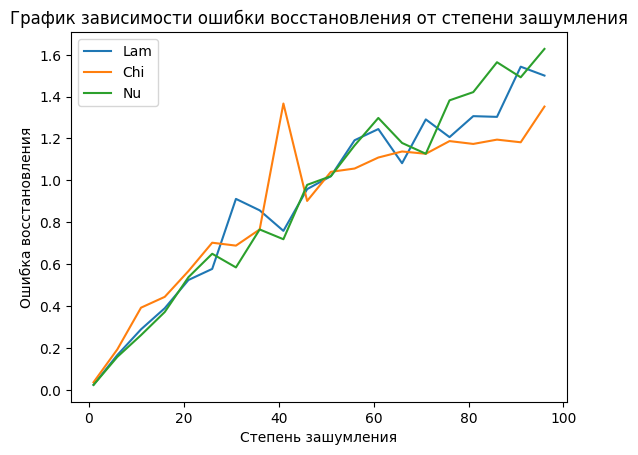

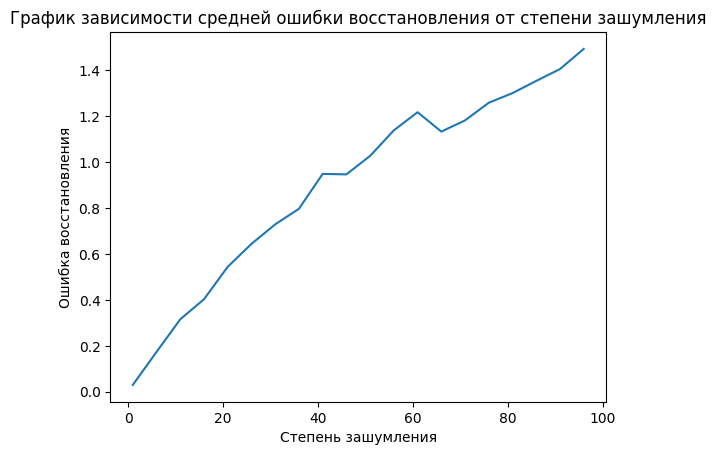

In [ ]:
def gen_noise_data(img):
  noise_list = np.array([])
  error_list = np.array([])
  for i in range(1, 100, 5):
    noisy_img = add_noise(img, i)
    predicted_img = noisy_img.copy()
    predicted_img = np.sign(np.dot(W, predicted_img))
    error_pred_true = np.sum(predicted_img != img)
    error_noisy_true = np.sum(noisy_img != img)
    total_error = error_noisy_true / error_pred_true
    noise_list = np.append(noise_list, i)
    error_list = np.append(error_list, total_error)
  return noise_list, error_list

noise_list_lam, error_list_lam = gen_noise_data(lam)
noise_list_chi, error_list_chi = gen_noise_data(chi)
noise_list_nu, error_list_nu = gen_noise_data(nu)



plt.plot(noise_list_lam, error_list_lam, label="Lam")
plt.plot(noise_list_chi, error_list_chi, label="Chi")
plt.plot(noise_list_nu, error_list_nu, label="Nu")
plt.title("График зависимости ошибки восстановления от степени зашумления")
plt.xlabel("Степень зашумления")
plt.ylabel("Ошибка восстановления")
plt.legend()
plt.show()

plt.plot((noise_list_lam + noise_list_chi + noise_list_nu) / 3, (error_list_lam + error_list_chi + error_list_nu) / 3)
plt.title("График зависимости средней ошибки восстановления от степени зашумления")
plt.xlabel("Степень зашумления")
plt.ylabel("Ошибка восстановления")
plt.show()


На основе графика можно заметить, что значение ошибки восстановления постепенно увеличивается из-за того, что у сети все хуже получается распознавать образ. Соответственно с увеличением количества шумов сеть начинает хуже угадывать изображения.

**Вывод:**

В процессе выполнения работы была обучена нейронная сеть Хопфилда распознавать образы трех греческих цифр. Для обучения сети были созданы три матрицы, содержащие образы этих цифр. Затем после обучения результаты были сравнены. Ни один из образов не был распознан сетью верно при зашумлении в 20%. Ошибки восстановления для всех трех образов сильно велики. На основе графиков зависимости процента шума тестового образа и ошибки восстановления можно заметить тенденцию к увеличению значения ошибки при увеличении процента шума изображения, что свидетельствует об ухудшении качества распознавания образа при большем количестве шумов.

**Дополнительное задание:**

Создать дополнительно четвертый эталонный образ, дообучить сеть и вывести значения метрик. Создать график.

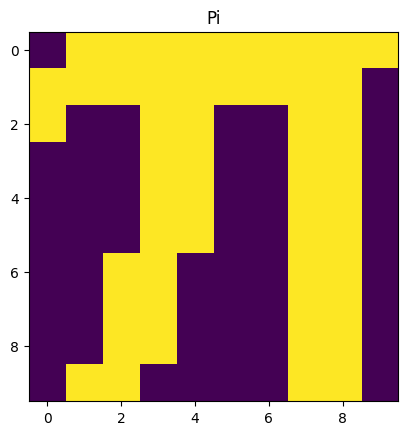

Ошибка восстановления для Lam равна 0.5405405405405406
Ошибка восстановления для Chi равна 0.5405405405405406
Ошибка восстановления для Nu равна 0.4
Ошибка восстановления для Pi равна 0.3508771929824561


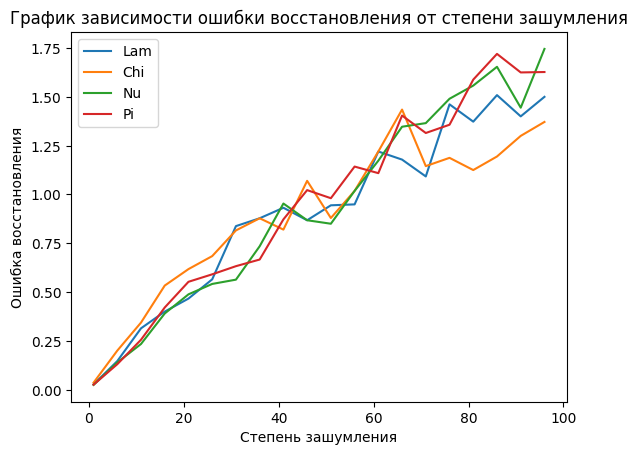

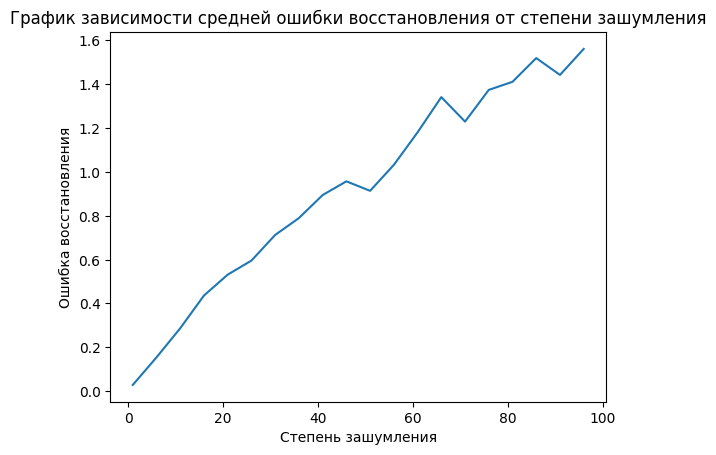

In [ ]:
# греческая цифра, обозначающая 80
pi = np.array([
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [1, -1, -1, 1, 1, -1, -1, 1, 1, -1],
    [-1, -1, -1, 1, 1, -1, -1, 1, 1, -1],
    [-1, -1, -1, 1, 1, -1, -1, 1, 1, -1],
    [-1, -1, -1, 1, 1, -1, -1, 1, 1, -1],
    [-1, -1, 1, 1, -1, -1, -1, 1, 1, -1],
    [-1, -1, 1, 1, -1, -1, -1, 1, 1, -1],
    [-1, -1, 1, 1, -1, -1, -1, 1, 1, -1],
    [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1]
])

# вывод 4 эталонного изображения
plt.imshow(pi)
plt.title("Pi")
plt.show()

n_neurons = lam.shape[0]

# матрица весовых коэф.
W = np.zeros((n_neurons, n_neurons))

# обучение сети путем изменения матрицы весовых коэф.
for s in lam:
    # создание матрицы обновления весов
    W += np.outer(s.flatten(), s.flatten()) # внешнее произведение векторов

for s in chi:
    W += np.outer(s.flatten(), s.flatten())

for s in nu:
    W += np.outer(s.flatten(), s.flatten())

for s in pi:
    W += np.outer(s.flatten(), s.flatten())

# зануление диагонали матрицы весов
np.fill_diagonal(W, 0)

# нормализация коэффициентов
W /= n_neurons*n_neurons

# генерация зашумленных изображений для теста
noisy_lam_20 = add_noise(lam, 20)
noisy_chi_20 = add_noise(chi, 20)
noisy_nu_20 = add_noise(nu, 20)
noisy_pi_20 = add_noise(pi, 20)

# выполнение предсказаний
predicted_lam = noisy_lam_20.copy()
predicted_lam = np.sign(np.dot(W, predicted_lam))

predicted_chi = noisy_chi_20.copy()
predicted_chi = np.sign(np.dot(W, predicted_chi))

predicted_nu = noisy_nu_20.copy()
predicted_nu = np.sign(np.dot(W, predicted_nu))

predicted_pi = noisy_nu_20.copy()
predicted_pi = np.sign(np.dot(W, predicted_pi))

# рассчет значений ошибки восстановления
error_pred_true_lam = np.sum(predicted_lam != lam)
error_noisy_true_lam = np.sum(noisy_lam_20 != lam)
total_error_lam = error_noisy_true_lam / error_pred_true_lam

print(f"Ошибка восстановления для Lam равна {total_error_lam}")

error_pred_true_chi = np.sum(predicted_chi != chi)
error_noisy_true_chi = np.sum(noisy_chi_20 != chi)
total_error_chi = error_noisy_true_chi/  error_pred_true_chi

print(f"Ошибка восстановления для Chi равна {total_error_chi}")

error_pred_true_nu = np.sum(predicted_nu != nu)
error_noisy_true_nu = np.sum(noisy_nu_20 != nu)
total_error_nu = error_noisy_true_nu / error_pred_true_nu

print(f"Ошибка восстановления для Nu равна {total_error_nu}")

error_pred_true_pi = np.sum(predicted_pi != pi)
error_noisy_true_pi = np.sum(noisy_pi_20 != pi)
total_error_pi = error_noisy_true_pi / error_pred_true_pi

print(f"Ошибка восстановления для Pi равна {total_error_pi}")

# создание данных для построения графика
noise_list_lam, error_list_lam = gen_noise_data(lam)
noise_list_chi, error_list_chi = gen_noise_data(chi)
noise_list_nu, error_list_nu = gen_noise_data(nu)
noise_list_pi, error_list_pi = gen_noise_data(pi)

# построения графика для 4 образов
plt.plot(noise_list_lam, error_list_lam, label="Lam")
plt.plot(noise_list_chi, error_list_chi, label="Chi")
plt.plot(noise_list_nu, error_list_nu, label="Nu")
plt.plot(noise_list_pi, error_list_pi, label="Pi")
plt.title("График зависимости ошибки восстановления от степени зашумления")
plt.xlabel("Степень зашумления")
plt.ylabel("Ошибка восстановления")
plt.legend()
plt.show()

# построение усредненного графика
plt.plot((noise_list_lam + noise_list_chi + noise_list_nu + noise_list_pi) / 4, (error_list_lam + error_list_chi + error_list_nu + error_list_pi) / 4)
plt.title("График зависимости средней ошибки восстановления от степени зашумления")
plt.xlabel("Степень зашумления")
plt.ylabel("Ошибка восстановления")
plt.show()

В результате обучения сети Хопфилда на 4 образах было выявлено снижение качества распознавания для всех образов, кроме первого. На общем графике зависимости ошибки восстановлния от степени зашумления можно заметить также более резкое увеличение значения при увеличении процента шума.

В результате было выявлено, что при увеличении количества образов сеть начинает хуже их распознавать.